In [ ]:
import dataclasses
import pprint

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import config
import ocef
import sources_of_envy
import utils

utils.setup_root_logging()

%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
conf = config.Configuration(
    envy_experiment_name="paper_511_config",
    lastfm_ground_truth_file=config.ROOT_DIR
    / "lastfm"
    / "paper_models"
    / "ground_truth.npz",
    lastfm_recommender_dir=config.ROOT_DIR / "lastfm" / "paper_models",
    movielens_ground_truth_file=config.ROOT_DIR
    / "movielens-1m"
    / "paper_models"
    / "ground_truth.npz",
    movielens_recommender_dir=config.ROOT_DIR / "movielens-1m" / "paper_models",
    # NOTE point ocef_dir to the folder with your ocef results, default is
    # FACT/results_ocef
)
pprint.pprint(dataclasses.asdict(conf))

{'datasets': ['movielens', 'lastfm'],
 'envy_experiment_name': 'paper_511_config',
 'epsilon': 0.05,
 'evaluation_k': 40,
 'experiment': None,
 'ground_truth_files': {'lastfm': PosixPath('../lastfm/paper_models/ground_truth.npz'),
                        'movielens': PosixPath('../movielens-1m/paper_models/ground_truth.npz')},
 'ground_truth_models': {'lastfm': <class 'recommender_models.LMF'>,
                         'movielens': <class 'recommender_models.ALS'>},
 'lastfm_ground_truth_file': PosixPath('../lastfm/paper_models/ground_truth.npz'),
 'lastfm_ground_truth_model': <class 'recommender_models.LMF'>,
 'lastfm_recommender_dir': PosixPath('../lastfm/paper_models'),
 'lastfm_recommender_model': <class 'recommender_models.SVDS'>,
 'lastfm_topk_artists': 2500,
 'movielens_do_log': False,
 'movielens_ground_truth_file': PosixPath('../movielens-1m/paper_models/ground_truth.npz'),
 'movielens_ground_truth_model': <class 'recommender_models.ALS'>,
 'movielens_recommender_dir': PosixPa

Plot using existing files from ../results_ocef


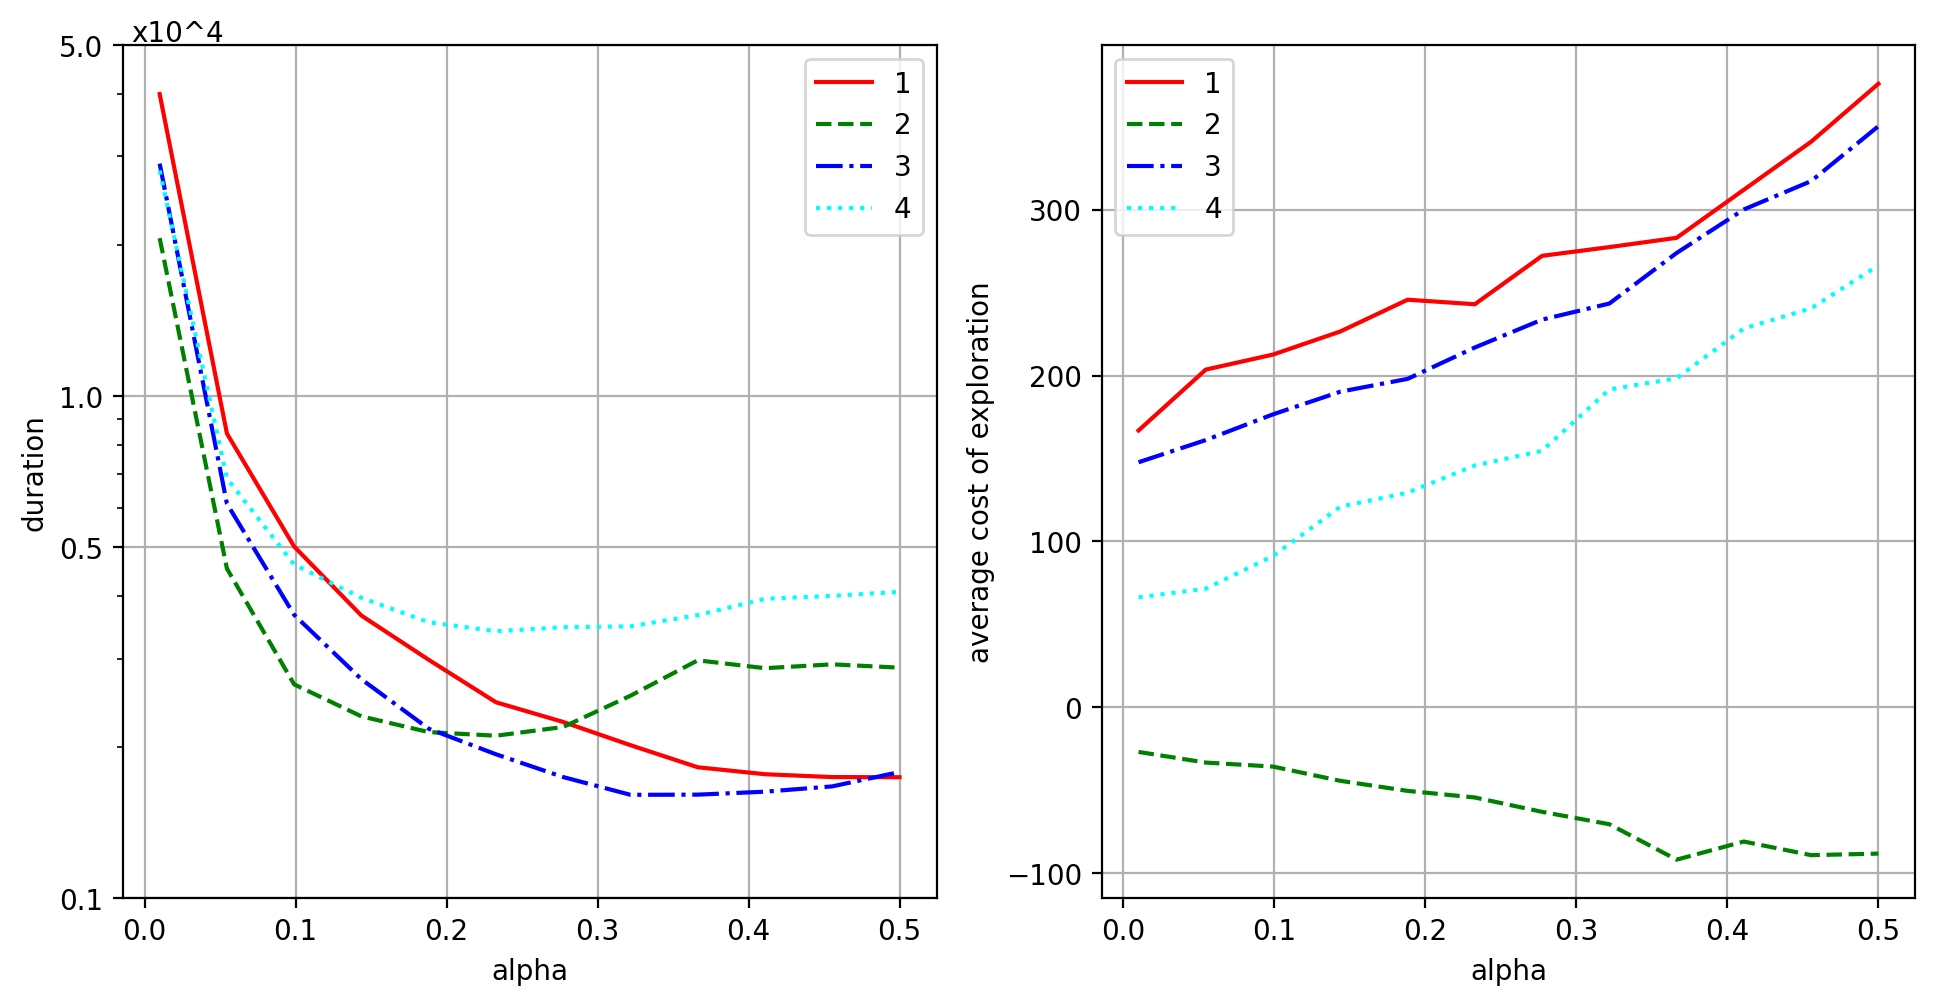

In [ ]:
ocef.main(conf)

In [ ]:
metrics_df = sources_of_envy.envy_from_misspecification(conf)
metrics_df

p99991 [23-02-03 21:12] [INFO]  Loading ground truth preferences from ../movielens-1m/paper_models/ground_truth.npz  (recommender:187)
p99991 [23-02-03 21:12] [INFO]  Load pretrained recommenders from ../movielens-1m/paper_models (no grid search for <class 'recommender_models.SVDS'>)  (recommender:199)
p99991 [23-02-03 21:12] [INFO]  Loading ground truth preferences from ../lastfm/paper_models/ground_truth.npz  (recommender:187)
p99991 [23-02-03 21:12] [INFO]  Load pretrained recommenders from ../lastfm/paper_models (no grid search for <class 'recommender_models.SVDS'>)  (recommender:199)


,mean_envy,prop_eps_envy,dataset
64,0.152573,0.853500,movielens
256,0.037703,0.353500,movielens
4,0.161279,0.948000,movielens
8,0.073866,0.725500,movielens
128,0.047727,0.439500,movielens
32,0.023096,0.184500,movielens
2,0.199542,0.979000,movielens
1,0.225826,0.991500,movielens
16,0.046778,0.468000,movielens
64,0.374105,0.833510,lastfm


p99991 [23-02-03 21:12] [INFO]  Saved plot and CSV dataframe to ../results_envy/paper_511_config  (sources_of_envy:160)


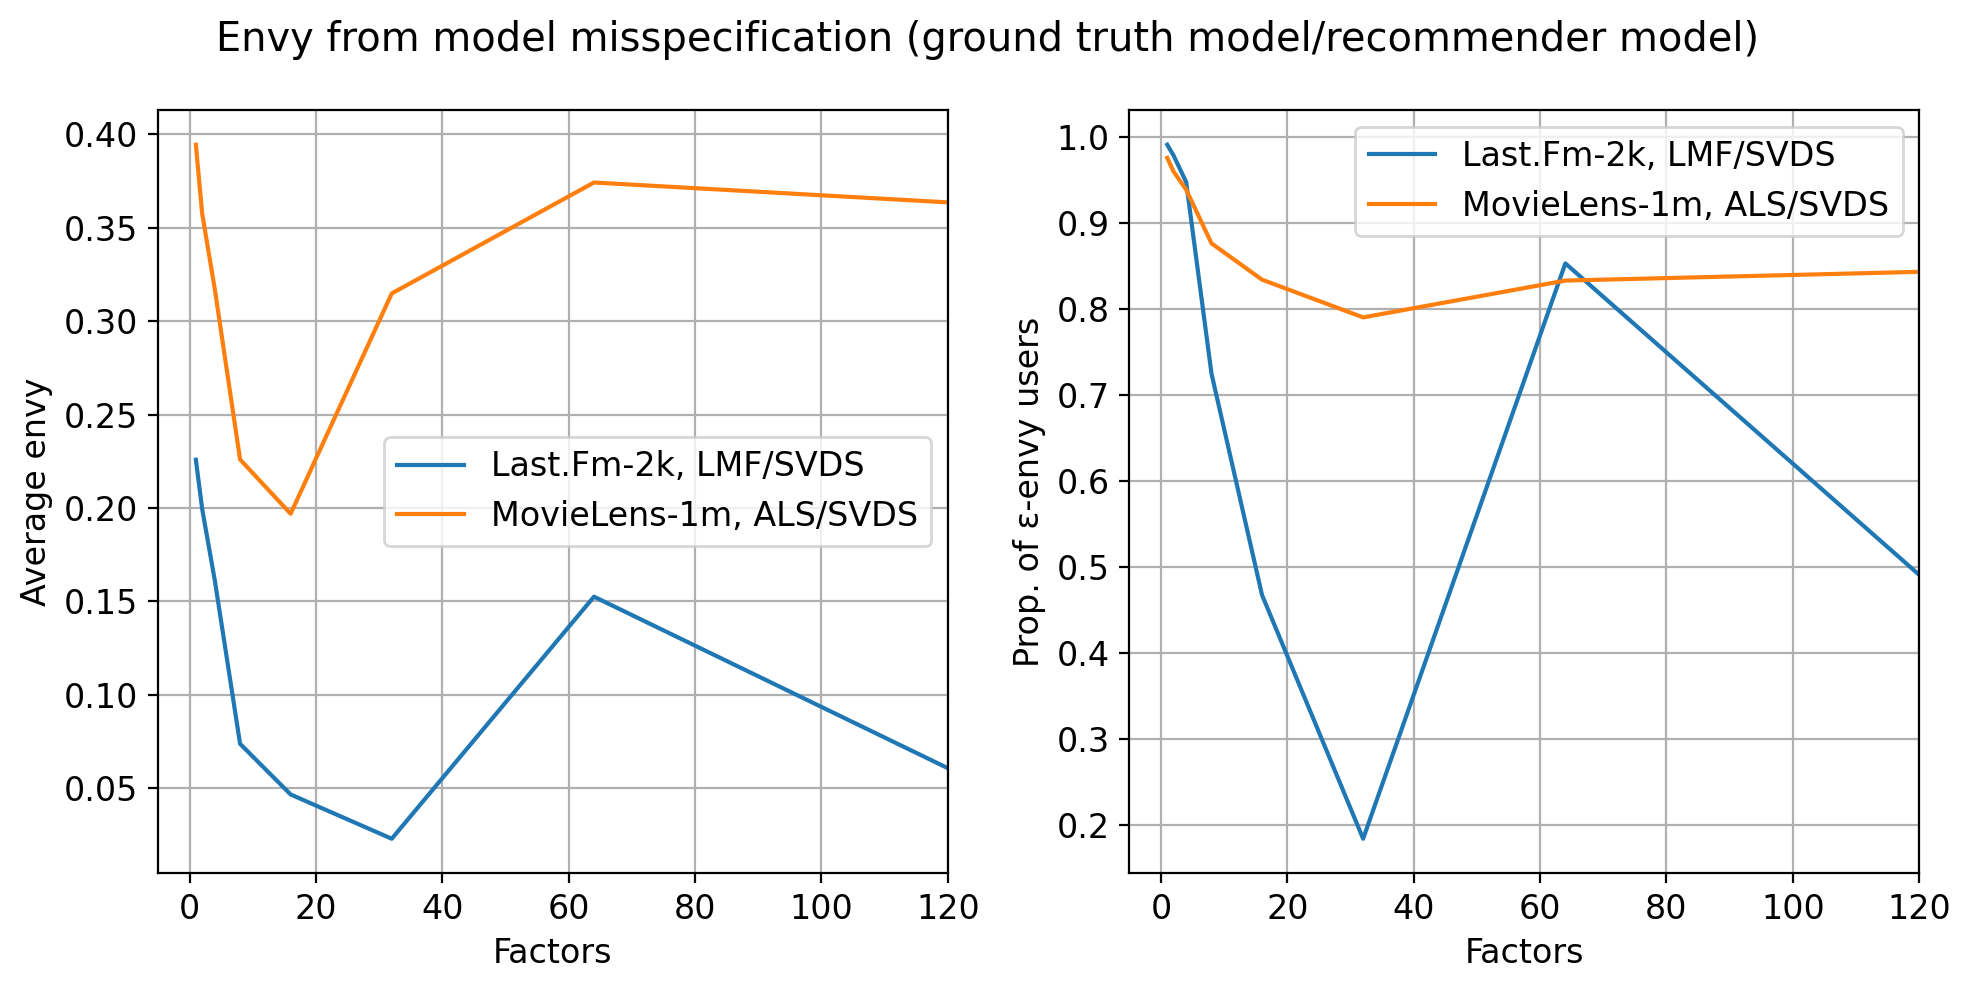

In [ ]:
sources_of_envy.persist_results(metrics_df, conf)